# 라이브러리

In [ ]:
!pip install jinja2==3.0.1
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 4.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 77 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 4.5 MB/s 
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.0.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |██████

In [ ]:
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [1]:
!pip install catboost
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 20.3 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tslearn.clustering import TimeSeriesKMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error 

#model
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

#pycaret
#import jinja2
#from pycaret.regression import *

Mounted at /content/drive


# 데이터 불러오기

- id : 샘플 아이디
- Store : 쇼핑몰 지점
- Date : 주 단위(Weekly) 날짜
- Temperature : 해당 쇼핑몰 주변 기온
- Fuel_Price : 해당 쇼핑몰 주변 연료 가격
- Promotion 1~5 : 해당 쇼핑몰의 비식별화된 프로모션 정보
- Unemployment : 해당 쇼핑몰 지역의 실업률
- IsHoliday : 해당 기간의 공휴일 포함 여부
- Weekly_Sales : 주간 매출액 (목표 예측값)

In [3]:
train = pd.read_csv('/content/drive/MyDrive/프로젝트/쇼핑몰 지점별 매출액 /train.csv')
train['Date'] = pd.to_datetime(train['Date'],format='%d/%m/%Y') # 날짜 연월일 순으로 변환 

In [4]:
test = pd.read_csv('/content/drive/MyDrive/프로젝트/쇼핑몰 지점별 매출액 /test.csv')
test['Date'] = pd.to_datetime(test['Date'],format='%d/%m/%Y') # 날짜 연월일 순으로 변환 

In [5]:
sample_submission = pd.read_csv('/content/drive/MyDrive/프로젝트/쇼핑몰 지점별 매출액 /sample_submission.csv')

In [6]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,2012-08-31,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,2012-09-07,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,2012-09-14,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,2012-09-21,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


In [7]:
test

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday
0,1,1,2012-10-05,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,6.573,False
1,2,1,2012-10-12,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,6.573,False
2,3,1,2012-10-19,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,6.573,False
3,4,1,2012-10-26,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False
4,5,2,2012-10-05,70.27,3.617,6037.76,NaN,10.04,3027.37,3853.40,6.170,False
...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,44,2012-10-26,46.97,3.755,38.65,2.61,0.98,NaN,457.74,5.217,False
176,177,45,2012-10-05,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,8.667,False
177,178,45,2012-10-12,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,8.667,False
178,179,45,2012-10-19,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,8.667,False


# 군집화 

In [8]:
def create_cluster_data(df, col):
  clustering_df = []   # 군집화 데이터 
  ticker_list = df['Store'].unique()   # Store list 

  for ticker in ticker_list:
    ticker_df = df[df['Store'] == ticker]
    ticker_df = ticker_df.loc[:,[col]]  

    clustering_df.append(ticker_df)

  return clustering_df

In [9]:
def create_cluster_data(df, col):
  clustering_df = []   # 군집화 데이터 
  ticker_list = df['Store'].unique()   # Store list 

  for ticker in ticker_list:
    ticker_df = df[df['Store'] == ticker]
    ticker_df = ticker_df.loc[:,["Date",col]]  
    ticker_df.set_index("Date",inplace=True)   # 인덱스 지정  
    ticker_df.sort_index(inplace=True)   # 날짜 순 정렬 

    clustering_df.append(ticker_df)

  return clustering_df

In [10]:
def MinMax_df(clustering_df):
  for i in range(len(clustering_df)):
      clustering_df[i] = MinMaxScaler().fit_transform(clustering_df[i])
      clustering_df[i]= clustering_df[i].reshape(len(clustering_df[i]))
      
  return clustering_df

In [11]:
def cluster_group(df, cluster_num):
  cluster_info = []

  for store, label in zip(df['Store'].unique(), labels):
    if label == cluster_num:
      cluster_info.append(store)

  print('Cluster {0} 쇼핑몰 지점: {1}'.format(cluster_num,cluster_info))

In [12]:
def cluster_result_dict(stores, labels):
  cluster_result = {}

  for store, label in zip(stores, labels):
    cluster_result[store] = label
  
  return cluster_result

In [13]:
def create_new_col(df, new_col_name, cluster_result_dict):
  new_col_list = []

  for i in range(len(df)):
    store = df.Store.iloc[i]
    new_col_list.append(cluster_result_dict[store])
  
  df[new_col_name] = new_col_list
  
  return df 

## Fuel_Price 군집화 파생변수

In [14]:
clustering_df = create_cluster_data(train, 'Fuel_Price')

print("군집화 데이터 shape:", np.shape(clustering_df))

군집화 데이터 shape: (45, 139, 1)


In [15]:
clustering_df = MinMax_df(clustering_df)
print("군집화 데이터 shape:", np.shape(clustering_df))

군집화 데이터 shape: (45, 139)


In [16]:
km = TimeSeriesKMeans(n_clusters=5, metric="dtw", verbose=False, random_state=100, n_jobs=-1)
labels = km.fit_predict(clustering_df)

In [17]:
for i in range(5):
  cluster_group(train,i)

Cluster 0 쇼핑몰 지점: [1, 2, 3, 4, 5, 6, 8, 9, 11, 21, 30, 31, 34, 36, 37, 39, 43]
Cluster 1 쇼핑몰 지점: [7, 13, 16, 17, 32, 41, 44]
Cluster 2 쇼핑몰 지점: [14, 15, 18, 19, 20, 22, 23, 24, 25, 26, 27, 29, 35, 40, 45]
Cluster 3 쇼핑몰 지점: [12, 28, 38]
Cluster 4 쇼핑몰 지점: [10, 33, 42]


In [18]:
stores = train['Store'].unique()
Fuel_Price_cluster_result = cluster_result_dict(stores, labels)

In [19]:
train = create_new_col(train, 'Fuel_Price_Cluster', Fuel_Price_cluster_result)
test = create_new_col(test, 'Fuel_Price_Cluster', Fuel_Price_cluster_result)

In [20]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Fuel_Price_Cluster
0,1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90,0
1,2,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44,0
2,3,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17,0
3,4,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59,0
4,5,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,2012-08-31,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,2
6251,6252,45,2012-09-07,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,2
6252,6253,45,2012-09-14,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27,2
6253,6254,45,2012-09-21,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,2


In [21]:
test

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Fuel_Price_Cluster
0,1,1,2012-10-05,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,6.573,False,0
1,2,1,2012-10-12,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,6.573,False,0
2,3,1,2012-10-19,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,6.573,False,0
3,4,1,2012-10-26,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False,0
4,5,2,2012-10-05,70.27,3.617,6037.76,NaN,10.04,3027.37,3853.40,6.170,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,44,2012-10-26,46.97,3.755,38.65,2.61,0.98,NaN,457.74,5.217,False,1
176,177,45,2012-10-05,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,8.667,False,2
177,178,45,2012-10-12,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,8.667,False,2
178,179,45,2012-10-19,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,8.667,False,2


## Weekly_Sales 군집화 파생변수

In [22]:
clustering_df = create_cluster_data(train, 'Weekly_Sales')

print("군집화 데이터 shape:", np.shape(clustering_df))

군집화 데이터 shape: (45, 139, 1)


In [23]:
clustering_df = MinMax_df(clustering_df)
print("군집화 데이터 shape:", np.shape(clustering_df))

군집화 데이터 shape: (45, 139)


In [24]:
km = TimeSeriesKMeans(n_clusters=3, metric="dtw", verbose=False, random_state=100, n_jobs=-1)
labels = km.fit_predict(clustering_df)

In [25]:
for i in range(3):
  cluster_group(train,i)

Cluster 0 쇼핑몰 지점: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35, 39, 40, 41, 45]
Cluster 1 쇼핑몰 지점: [30, 33, 36, 42, 43]
Cluster 2 쇼핑몰 지점: [17, 18, 37, 38, 44]


In [26]:
stores = train['Store'].unique()
Weekly_Sales_cluster_result = cluster_result_dict(stores, labels)

In [27]:
train = create_new_col(train, 'Weekly_Sales_Cluster', Weekly_Sales_cluster_result)
test = create_new_col(test, 'Weekly_Sales_Cluster', Weekly_Sales_cluster_result)

In [28]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Fuel_Price_Cluster,Weekly_Sales_Cluster
0,1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90,0,0
1,2,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44,0,0
2,3,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17,0,0
3,4,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59,0,0
4,5,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,2012-08-31,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,2,0
6251,6252,45,2012-09-07,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,2,0
6252,6253,45,2012-09-14,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27,2,0
6253,6254,45,2012-09-21,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,2,0


In [29]:
test

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Fuel_Price_Cluster,Weekly_Sales_Cluster
0,1,1,2012-10-05,68.55,3.617,8077.89,NaN,18.22,3617.43,3626.14,6.573,False,0,0
1,2,1,2012-10-12,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,6.573,False,0,0
2,3,1,2012-10-19,67.97,3.594,950.33,NaN,4.93,80.25,2312.85,6.573,False,0,0
3,4,1,2012-10-26,69.16,3.506,2585.85,31.75,6.00,1057.16,1305.01,6.573,False,0,0
4,5,2,2012-10-05,70.27,3.617,6037.76,NaN,10.04,3027.37,3853.40,6.170,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,44,2012-10-26,46.97,3.755,38.65,2.61,0.98,NaN,457.74,5.217,False,1,2
176,177,45,2012-10-05,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,8.667,False,2,0
177,178,45,2012-10-12,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,8.667,False,2,0
178,179,45,2012-10-19,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,8.667,False,2,0


# 결측치 0으로 대체

In [30]:
train.fillna(0, inplace = True)
test.fillna(0, inplace = True)

# 날짜 파생 변수 생성

In [31]:
train['day'] =train['Date'].dt.day 
train['week'] =train['Date'].dt.week 
train['month'] =train['Date'].dt.month 
train['year'] =train['Date'].dt.year 

test['day'] =test['Date'].dt.day 
test['week'] =test['Date'].dt.week 
test['month'] =test['Date'].dt.month 
test['year'] =test['Date'].dt.year 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [32]:
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Fuel_Price_Cluster,Weekly_Sales_Cluster,day,week,month,year
0,1,1,2010-02-05,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,0,0,5,5,2,2010
1,2,1,2010-02-12,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,0,0,12,6,2,2010
2,3,1,2010-02-19,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,0,0,19,7,2,2010
3,4,1,2010-02-26,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,0,0,26,8,2,2010
4,5,1,2010-03-05,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,0,0,5,9,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,2012-08-31,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,2,0,31,35,8,2012
6251,6252,45,2012-09-07,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,2,0,7,36,9,2012
6252,6253,45,2012-09-14,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,2,0,14,37,9,2012
6253,6254,45,2012-09-21,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,2,0,21,38,9,2012


# Label encoding

In [33]:
encoder = LabelEncoder()
encoder.fit(train['IsHoliday'])

train['IsHoliday'] = encoder.transform(train['IsHoliday'])
test['IsHoliday'] = encoder.transform(test['IsHoliday'])

In [34]:
train.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Fuel_Price_Cluster,Weekly_Sales_Cluster,day,week,month,year
0,1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,8.106,0,1643690.90,0,0,5,5,2,2010
1,2,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,8.106,1,1641957.44,0,0,12,6,2,2010
2,3,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,8.106,0,1611968.17,0,0,19,7,2,2010
3,4,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,8.106,0,1409727.59,0,0,26,8,2,2010
4,5,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,8.106,0,1554806.68,0,0,5,9,3,2010


# Random Forest: 기본모델

In [ ]:
X = train.drop(['id', 'Date', 'Weekly_Sales', 'Fuel_Price_Cluster', 'Weekly_Sales_Cluster'],axis=1)
y = train['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 100)   #train, test 데이터 분할 

In [ ]:
RF_model = RandomForestRegressor()   # 모델 생성
RF_model.fit(X_train, y_train)   # 학습

RandomForestRegressor()

In [ ]:
pred_train = RF_model.predict(X_train)

train_MSE = mean_squared_error(y_train, pred_train) 
train_RMSE = np.sqrt(train_MSE)

pred_test = RF_model.predict(X_test)

test_MSE = mean_squared_error(y_test, pred_test) 
test_RMSE = np.sqrt(test_MSE)

print('train_RMSE: ', train_RMSE)
print('test_RMSE: ', test_RMSE)

train_RMSE:  45874.35051282718
test_RMSE:  123674.79276677096


In [ ]:
def plot_feature_importance(importance, names, title):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(title)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

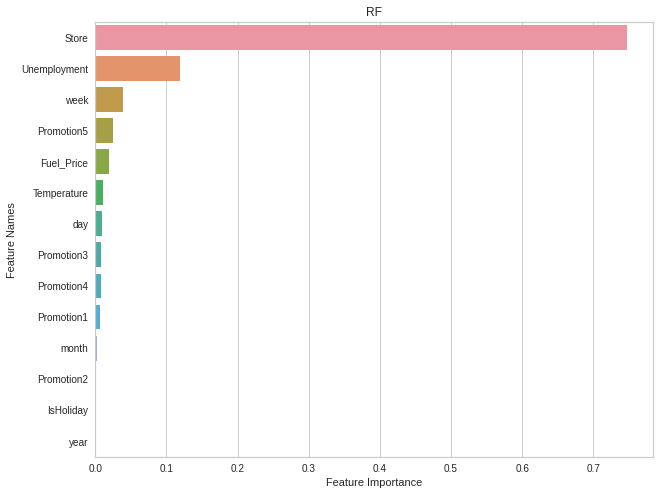

In [ ]:
plot_feature_importance(RF_model.feature_importances_, X_train.columns, 'RF')

# Random Forest: 파생변수 포함 

In [ ]:
X = train.drop(['id', 'Date', 'Weekly_Sales'],axis=1)
y = train['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 100)   #train, test 데이터 분할 

In [ ]:
RF_model = RandomForestRegressor()   # 모델 생성
RF_model.fit(X_train, y_train)   # 학습

RandomForestRegressor()

In [ ]:
pred_train = RF_model.predict(X_train)

train_MSE = mean_squared_error(y_train, pred_train) 
train_RMSE = np.sqrt(train_MSE)

pred_test = RF_model.predict(X_test)

test_MSE = mean_squared_error(y_test, pred_test) 
test_RMSE = np.sqrt(test_MSE)

print('train_RMSE: ', train_RMSE)
print('test_RMSE: ', test_RMSE)

train_RMSE:  39754.48660090585
test_RMSE:  112225.76042236663


In [ ]:
def plot_feature_importance(importance, names, title):
    
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    plt.figure(figsize=(10,8))

    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    plt.title(title)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

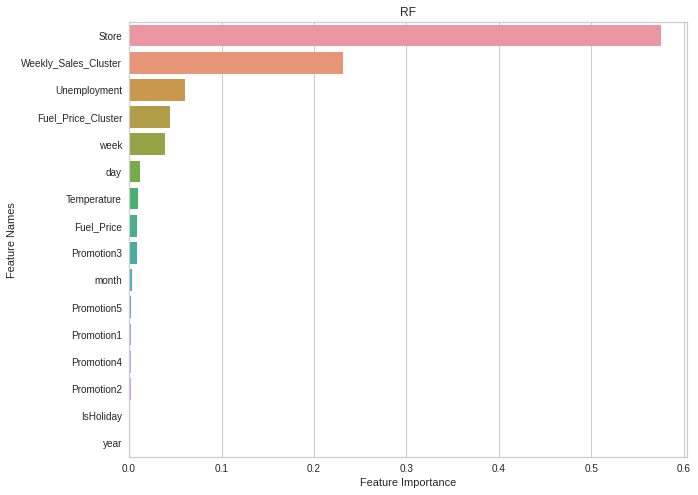

In [ ]:
plot_feature_importance(RF_model.feature_importances_, X_train.columns, 'RF')

# RF

In [40]:
X = train.drop(['id', 'Date', 'Weekly_Sales'],axis=1)
y = train['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 100)   #train, test 데이터 분할 

In [41]:
#모델 생성
model=RandomForestRegressor()

#최적화할 파라미터 범위
rf_param = {'n_estimators': [100, 200, 500],
             'max_depth': [12, 16, 20],
             'min_samples_leaf' : [1, 2, 4],
             'min_samples_split' : [2, 4, 6]
             }

grid_rf = GridSearchCV(model, param_grid=rf_param, scoring = 'neg_root_mean_squared_error', cv=5, n_jobs=-1)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [12, 16, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_root_mean_squared_error')

In [42]:
print('best params:\n', grid_rf.best_params_)
print('best score:', grid_rf.best_score_)

best params:
 {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
best score: -112685.96730422562


In [43]:
pred_train = grid_rf.predict(X_train)

train_MSE = mean_squared_error(y_train, pred_train) 
train_RMSE = np.sqrt(train_MSE)

pred_test = grid_rf.predict(X_test)

test_MSE = mean_squared_error(y_test, pred_test) 
test_RMSE = np.sqrt(test_MSE)

print('train_RMSE: ', train_RMSE)
print('test_RMSE: ', test_RMSE)

train_RMSE:  42296.791594309005
test_RMSE:  110464.7486219997


# CatBoost

In [36]:
X = train.drop(['id', 'Date', 'Weekly_Sales'],axis=1)
y = train['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 100)   #train, test 데이터 분할 

In [41]:
#모델 생성
model=CatBoostRegressor()

#최적화할 파라미터 범위 
cb_params = {'n_estimators': [100, 200, 500], 
            'learning_rate': [0.2, 0.1, 0.05], 
            'max_depth': [8, 10, 12], 
            'subsample': [0.6, 0.8, 0.9]}

grid_cb = GridSearchCV(model, param_grid=cb_params, scoring = 'neg_root_mean_squared_error', cv=5, n_jobs=-1)
grid_cb.fit(X_train, y_train)

0:	learn: 522794.0632303	total: 56ms	remaining: 27.9s
1:	learn: 478742.1905330	total: 63ms	remaining: 15.7s
2:	learn: 449252.3880122	total: 69.8ms	remaining: 11.6s
3:	learn: 426844.2218198	total: 76.4ms	remaining: 9.47s
4:	learn: 399148.2748931	total: 83.3ms	remaining: 8.24s
5:	learn: 382413.7096954	total: 90.8ms	remaining: 7.48s
6:	learn: 369757.0774360	total: 97.5ms	remaining: 6.87s
7:	learn: 336376.2976817	total: 105ms	remaining: 6.43s
8:	learn: 314439.8536832	total: 111ms	remaining: 6.08s
9:	learn: 302650.6950072	total: 118ms	remaining: 5.78s
10:	learn: 296585.8725172	total: 124ms	remaining: 5.52s
11:	learn: 291969.4214881	total: 131ms	remaining: 5.33s
12:	learn: 278719.3732979	total: 138ms	remaining: 5.17s
13:	learn: 263629.2404075	total: 145ms	remaining: 5.03s
14:	learn: 257747.6387266	total: 153ms	remaining: 4.93s
15:	learn: 245209.6320513	total: 160ms	remaining: 4.85s
16:	learn: 242789.0041515	total: 167ms	remaining: 4.75s
17:	learn: 227060.8263297	total: 174ms	remaining: 4.66s

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7fe34de4bd90>,
             n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.1, 0.05],
                         'max_depth': [8, 10, 12],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.6, 0.8, 0.9]},
             scoring='neg_root_mean_squared_error')

In [42]:
print('best params:', grid_cb.best_params_)
print('best score:', grid_cb.best_score_)

best params: {'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.9}
best score: -82006.05929772677


In [43]:
pred_train = grid_cb.predict(X_train)

train_MSE = mean_squared_error(y_train, pred_train) 
train_RMSE = np.sqrt(train_MSE)

pred_test = grid_cb.predict(X_test)

test_MSE = mean_squared_error(y_test, pred_test) 
test_RMSE = np.sqrt(test_MSE)

print('train_RMSE: ', train_RMSE)
print('test_RMSE: ', test_RMSE)

train_RMSE:  22305.43230466191
test_RMSE:  79183.55648352577


#LGBM

In [35]:
X = train.drop(['id', 'Date', 'Weekly_Sales'],axis=1)
y = train['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 100)   #train, test 데이터 분할 

In [36]:
#모델 생성
model=LGBMRegressor()

#최적화할 파라미터 범위 
lgbm_params = {'n_estimators': [100, 200, 500], 
              'learning_rate': [0.2, 0.1, 0.05], 
              'max_depth': [8, 10, 12], 
              'subsample': [0.6, 0.8, 0.9]}
            
grid_lgbm = GridSearchCV(model, param_grid=lgbm_params, scoring = 'neg_root_mean_squared_error', cv=5, n_jobs=-1)
grid_lgbm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.1, 0.05],
                         'max_depth': [8, 10, 12],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.6, 0.8, 0.9]},
             scoring='neg_root_mean_squared_error')

In [37]:
print('best params:', grid_lgbm.best_params_)
print('best score:', grid_lgbm.best_score_)

best params: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.6}
best score: -84048.92141678956


In [38]:
pred_train = grid_lgbm.predict(X_train)

train_MSE = mean_squared_error(y_train, pred_train) 
train_RMSE = np.sqrt(train_MSE)

pred_test = grid_lgbm.predict(X_test)

test_MSE = mean_squared_error(y_test, pred_test) 
test_RMSE = np.sqrt(test_MSE)

print('train_RMSE: ', train_RMSE)
print('test_RMSE: ', test_RMSE)

train_RMSE:  18768.83281759131
test_RMSE:  78788.91246299964


# Stacking

In [44]:
X = train.drop(['id', 'Date', 'Weekly_Sales'],axis=1)
y = train['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 100)   #train, test 데이터 분할 

In [45]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

In [51]:
RF_params = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
LGBM_params = {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.6}
CB_params = {'learning_rate': 0.2, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.9}

RF = RandomForestRegressor(**RF_params)
LGBM =LGBMRegressor(**LGBM_params)
CB = CatBoostRegressor(**CB_params)

stack_models = [
    ('RF', RF),
    ('LGBM', LGBM),
    ('CB', CB)
]

stacking_model = StackingRegressor(stack_models, final_estimator=LinearRegression(), n_jobs=-1)
stacking_model.fit(X_train, y_train)

StackingRegressor(estimators=[('RF', RandomForestRegressor(max_depth=20)),
                              ('LGBM',
                               LGBMRegressor(learning_rate=0.2, max_depth=10,
                                             n_estimators=500, subsample=0.6)),
                              ('CB',
                               <catboost.core.CatBoostRegressor object at 0x7fdb3ec1bcd0>)],
                  final_estimator=LinearRegression(), n_jobs=-1)

In [52]:
pred_train = stacking_model.predict(X_train)

train_MSE = mean_squared_error(y_train, pred_train) 
train_RMSE = np.sqrt(train_MSE)

pred_test = stacking_model.predict(X_test)

test_MSE = mean_squared_error(y_test, pred_test) 
test_RMSE = np.sqrt(test_MSE)

print('train_RMSE: ', train_RMSE)
print('test_RMSE: ', test_RMSE)

train_RMSE:  21958.305702904014
test_RMSE:  73889.37158031309


# Pycaret
- https://today-1.tistory.com/17

In [ ]:
X = train.drop(['id', 'Date', 'Weekly_Sales'],axis=1)
y = train['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 100)   #train, test 데이터 분할 

In [ ]:
data = X_train.copy()
data['Weekly_Sales'] = y_train

In [ ]:
s = setup(data = data, target = 'Weekly_Sales', session_id=123)

best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,5.617661e+04,8.013994e+09,8.907827e+04,9.751000e-01,0.0885,0.0612,4.869
lightgbm,Light Gradient Boosting Machine,6.184056e+04,1.208562e+10,1.091940e+05,9.622000e-01,0.0963,0.0640,0.226
rf,Random Forest Regressor,5.991023e+04,1.264536e+10,1.116979e+05,9.607000e-01,0.0847,0.0555,2.128
dt,Decision Tree Regressor,7.773937e+04,2.226120e+10,1.476885e+05,9.309000e-01,0.1128,0.0704,0.047
gbr,Gradient Boosting Regressor,1.304277e+05,3.135078e+10,1.765505e+05,9.025000e-01,0.1897,0.1549,0.520
et,Extra Trees Regressor,8.743999e+04,3.168916e+10,1.769629e+05,9.023000e-01,0.1481,0.0886,1.513
ridge,Ridge Regression,3.726154e+05,2.221837e+11,4.710363e+05,3.100000e-01,0.5066,0.4999,0.018
lr,Linear Regression,3.723762e+05,2.221966e+11,4.710500e+05,3.100000e-01,0.5061,0.4995,0.438
llar,Lasso Least Angle Regression,3.726226e+05,2.222001e+11,4.710540e+05,3.100000e-01,0.5069,0.5001,0.026
lasso,Lasso Regression,3.726010e+05,2.222003e+11,4.710542e+05,3.100000e-01,0.5071,0.5001,0.079


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 2
INFO:logs:<catboost.core.CatBoostRegressor object at 0x7f09cd6653d0>
INFO:logs:compare_models() succesfully completed......................................


INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f09cd6653d0>, fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

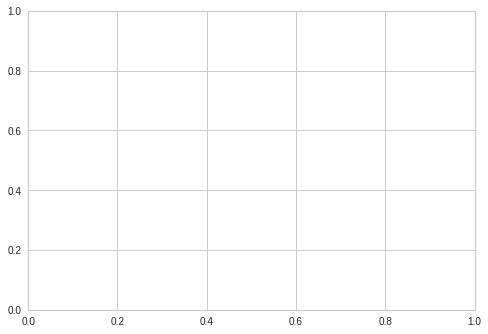

In [ ]:
evaluate_model(best)

In [ ]:
predictions = predict_model(best, data = X_test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=<catboost.core.CatBoostRegressor object at 0x7f09cd6653d0>, probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
